# Testing G2Net library Dataloaders

In [1]:
import os
os.chdir("../python")
os.getcwd()

'/home/joseph/Coding/ml_projects/g2net_ml_dl/python'

In [1]:
import pandas as pd
import g2net
from g2net.io.kfold import getKFolds
from g2net.train import create_dataloaders, sota_dl_transforms

data_dir = '~/datasets/g2net_train/'
train_df = pd.read_csv(data_dir + 'train.csv')
print(train_df.head())

folds = getKFolds(train_df, seeds=[42, 93, 234, 111, 5])
# Fold 1
fold_num = 0
train_idx, valid_idx = folds[fold_num][0], folds[fold_num][1]
train_fold, valid_fold = train_df.iloc[train_idx], train_df.iloc[valid_idx]
train_dl, valid_dl = create_dataloaders(train_fold, valid_fold, batch_size=16)
len(train_dl), len(valid_dl)

           id  target                                               path
0  00000e74ad       1  /home/joseph/datasets/g2net_train/train/0/0/0/...
1  00001f4945       0  /home/joseph/datasets/g2net_train/train/0/0/0/...
2  0000661522       0  /home/joseph/datasets/g2net_train/train/0/0/0/...
3  00007a006a       0  /home/joseph/datasets/g2net_train/train/0/0/0/...
4  0000a38978       1  /home/joseph/datasets/g2net_train/train/0/0/0/...


(21000, 7000)

<AxesSubplot:xlabel='target', ylabel='count'>

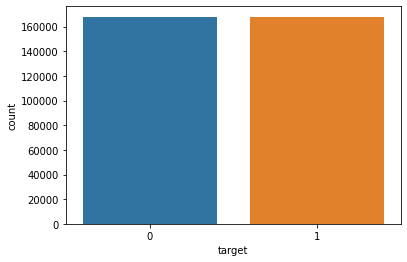

In [3]:
# investigate folds distr.
import seaborn as sns
sns.countplot(data=train_fold, x="target")

<AxesSubplot:xlabel='target', ylabel='count'>

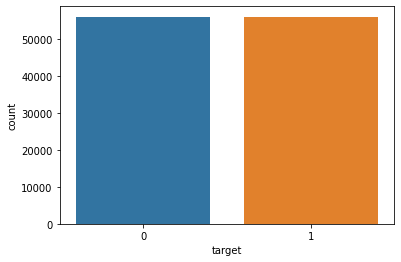

In [4]:
sns.countplot(data=valid_fold, x="target")

In [2]:
it = iter(train_dl)
train_batch = next(it)
train_batch[0].shape, train_batch[1].shape

(torch.Size([16, 3, 4096]), torch.Size([16, 1]))

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_sample(
    _id,
    path,
    target, 
    colors=("black", "red", "green"), 
    signal_names=("LIGO Hanford", "LIGO Livingston", "Virgo")
):
    x = np.load(path)
    plt.figure(figsize=(16, 7))
    for i in range(3):
        plt.subplot(4, 1, i + 1)
        plt.plot(x[i], color=colors[i])
        plt.legend([signal_names[i]], fontsize=12, loc="lower right")
        
        plt.subplot(4, 1, 4)
        plt.plot(x[i], color=colors[i])
    
    plt.subplot(4, 1, 4)
    plt.legend(signal_names, fontsize=12, loc="lower right")

    plt.suptitle(f"id: {_id} target: {target}", fontsize=16)
    plt.show()

248355


<ipython-input-5-13b3794f4a46>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 1, 4)
<ipython-input-5-13b3794f4a46>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 1, 4)
<ipython-input-5-13b3794f4a46>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

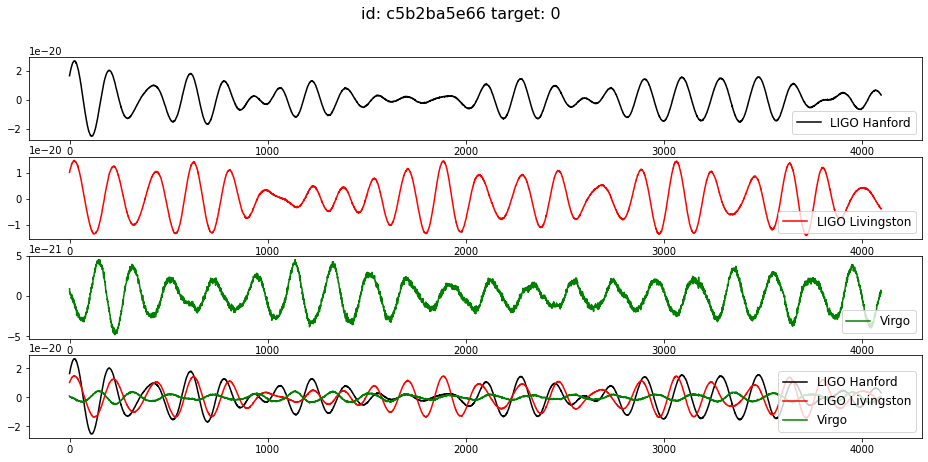

217614


<ipython-input-5-13b3794f4a46>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 1, 4)
<ipython-input-5-13b3794f4a46>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 1, 4)
<ipython-input-5-13b3794f4a46>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

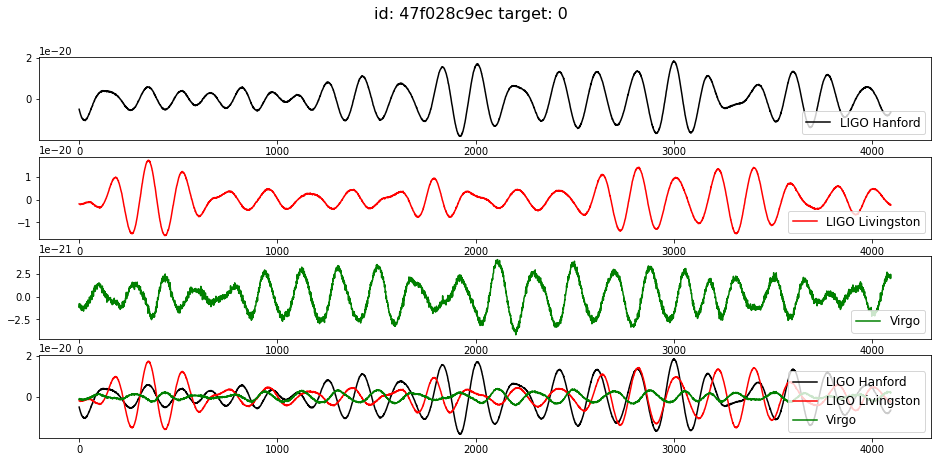

255890


<ipython-input-5-13b3794f4a46>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 1, 4)
<ipython-input-5-13b3794f4a46>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 1, 4)
<ipython-input-5-13b3794f4a46>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

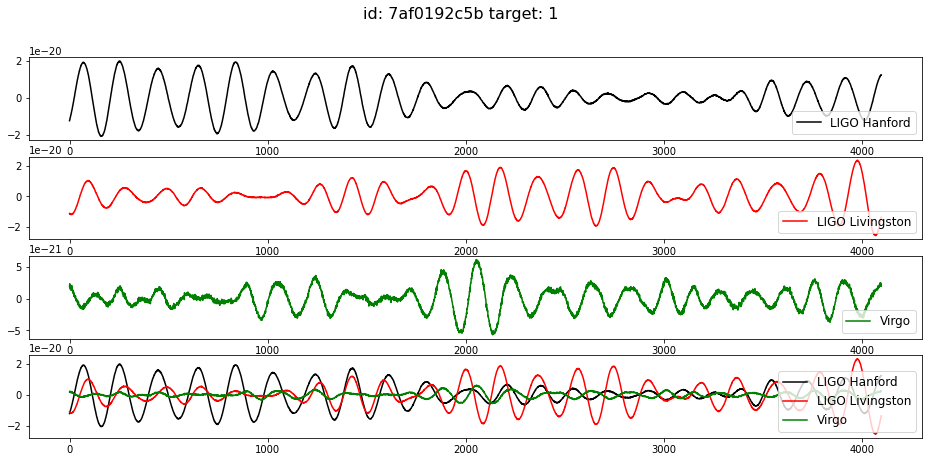

In [17]:
import random
# avoids IndexError: single positional indexer is out-of-bounds
# b/c train_fold uses the same indices as the orig train_df
train_fold = train_fold.reset_index()
# sampling 3 cases to display
for i in random.sample(train_fold.index.tolist(), 3):
    print(i)
    _id = train_fold.iloc[i]["id"]
    path = train_fold.iloc[i]["path"]
    target = train_fold.iloc[i]["target"]

    visualize_sample(_id, path, target)



# Integrating MiniRocket (`sktime` approach)
## Plan
- Create a small subset of the data that loads into memory
- Train on that subset
- See how well the model generalizes

In [ ]:
# Need to create a subset to train on?